In [1]:
import os
import pandas, numpy, seaborn
import sklearn, sklearn.decomposition, sklearn.decomposition, sklearn.pipeline, sklearn.preprocessing
import scipy, scipy.signal
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':30, 'ytick.labelsize':30, 'axes.labelsize':40, 'figure.figsize':(12, 8)})
import cycler
import pandas as pd
import re 
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
'''
# Open GDC manifest file.
mf_name = r'C:\Users\valld\Downloads\gdc_manifest.2023-09-20.txt'
data = pd.read_csv(mf_name,delimiter='\t')
# Directory where the files are saved.
output_directory = r"C:\Users\valld\Documents\UVIC\4rt Curs\Advanced Bioinformatics\Projects"
os.makedirs(output_directory, exist_ok=True)
count = 0
for _, row in data.iterrows():
    # Loop through the file IDs and download each file.
    file_id = str(row[0])
    print(file_id)
    data_endpt = "https://api.gdc.cancer.gov/data/{}".format(file_id)
    response = requests.get(data_endpt, headers={"Content-Type": "application/json"})
    # Check if the request was successful before proceeding.
    if response.status_code == 200:
        # The file name can be found in the header within the Content-Dispositionkey.
        response_head_cd = response.headers.get("Content-Disposition")
        if response_head_cd:
            file_name = re.findall("filename=(.+)", response_head_cd)[0]
            # Join the directory path with the file name to create the complete file path.
            output_file_path = os.path.join(output_directory, file_name)
            with open(output_file_path, "wb") as output_file:
                output_file.write(response.content)
                count = count + 1
                print(f"Downloaded file nº {count}: {file_name} " )
        else:
             print(f"Failed to get file name for file ID: {file_id}")
    else:
        print(f"Failed to download file ID: {file_id} - Status Code: {response.status_code}")'''

In [5]:
#also download metadata and try to associate patient ID's with case ID's
# Get the list of all files and directories in the root directory
path = r"C:\Users\valld\Documents\UVIC\4rt Curs\Advanced Bioinformatics\Projects"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :") 
# print the list
#print(dir_list)

Files and directories in ' C:\Users\valld\Documents\UVIC\4rt Curs\Advanced Bioinformatics\Projects ' :


In [6]:
#We use a for loop to create a list containing the names of the files in our directory
#for element in dir_list:
    #print(element)

In [ ]:
dir_list

In [ ]:
path_to_data=r"C:\Users\valld\Documents\UVIC\4rt Curs\Advanced Bioinformatics\Projects"
os.listdir(path_to_data)

In [ ]:
concat_df=pandas.DataFrame()
print(type(concat_df))
for element in dir_list: 
    #We first visualize the name of the file 
    #print(element)
    #specify path
    path_to_data=r"C:/Users/valld/Documents/UVIC/4rt Curs/Advanced Bioinformatics/Projects/"
    full_path=path_to_data+element
    print(full_path)
    #Create a dataframe of that file
    df = pandas.read_csv(full_path, sep="\t",skiprows=1, index_col=0)
    df.drop(['gene_name', 'gene_type'], axis=1, inplace = True)
    df.drop(['N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous'], axis=0, inplace= True)
    #specify row and column indexes
    #file_id = str(row[1]).split('.')[0]
    #take the first column of each one
    expression_column = df['tpm_unstranded']
    expression_column = expression_column.rename(element.split('.')[0])   ######################
    if concat_df.shape == (0,0):
        concat_df = expression_column 
        print('starting to construct the concatenated dataframe')
    else:
        concat_df = pandas.concat([concat_df, expression_column], axis=1)

In [10]:
df

""
"ENSG00000000005.6,0.124,0.0574,0.3693,0.1329,0.2247,0.4833,0.1869,0.1058,0.1501,0.0447,0.2038,0.035,0.0,0.1804,0.0,0.0459,0.0,0.0383,0.0305,0.0959,0.0311,0.2104,0.3704,0.0364,0.0206,0.0,0.0,0.0,0.0285,0.0,0.1455,0.1201,0.08,0.0484,0.0,0.2469,0.0,0.1922,0.1822,0.0445,0.7185,0.0,0.0303,0.086,0.1349,0.0,0.2294,0.0,0.0,0.0565,0.0966,0.2915,0.0,0.0287,0.1953,0.0309,0.06,0.5116,0.0333,0.3581,0.0762,0.0,0.0477,0.0,0.1932,0.0818,0.0277,0.0,0.1387,0.0391,0.3008,0.0,0.2112,0.0905,0.0,0.1205,0.0533,0.1396,0.0,0.1144,0.0343,0.081,0.126,0.2114,0.0,0.0,0.0411,0.0,0.0274,0.5961,0.2955,0.174,0.0621,0.0376,0.0345,0.0,0.0296,0.0,0.2095,0.046,0.2831,0.2597,0.0459,0.1198,0.1009,0.2772,0.1169,0.1017,0.0,0.1093,0.0,0.0673,0.0,0.0,0.0,0.0531,0.0929,0.0774,0.2563,0.0705,0.3632,0.0835,0.0,0.1302,0.0,0.1815,0.2803,0.0,0.0,0.0,0.0,0.6806,0.0404,0.1886,1.3552,0.6607,0.2078,0.2588,0.7608,0.0297,0.0,0.0385,0.1122,0.1052,0.6555,0.2196,0.0262,0.1072,0.2082,0.4358,0.0,0.0451,0.2534,0.0,0.0781,0.3282,0.0624,0.058,0.414,0.0639,0.0845,0.0307,0.3662,0.0758,0.2491,0.1199,0.0,0.2157,0.0,0.1899,0.0,0.2247,0.025,0.0394,0.0769,0.0287,0.2005,0.1599,0.0,2.6292,0.344,0.0,0.0651,0.1026,0.0,0.0,0.0789,0.0869,0.3254,0.0,0.0,0.1212,0.1309,0.0463,0.0232,0.3554,0.0981,0.2598,0.0562,0.2008,0.0425,0.0981,0.0,0.0642,0.0419,0.4584,0.2106,0.4322,0.2479,0.0405,0.1351,0.0914,0.0,0.3017,0.5105,0.0,0.0467,0.0,0.0396,0.0897,0.0,0.2432,0.0,0.0,0.2128,0.0299,0.105,0.0761,0.0435,0.0322,0.4153,0.2667,0.0382,0.1218,0.1221,0.102,0.0,0.0723,0.1769,0.0699,1.1513,0.0483,0.0285,0.1691,0.055,0.0,0.0948,0.0525,0.0686,0.1627,0.0816,0.0732,0.0,0.0,0.0356,0.0605,0.1421,0.1018,0.0,0.0,0.0,0.1415,0.3608,0.1521,0.0577,0.0338,0.0879,0.187,0.1665,0.0,0.0,0.1185,0.1501,0.0431,0.0891,0.0381,0.0,0.0,0.0422,0.5002,0.1146,0.0299,0.0,0.034,0.1593,0.0372,0.9227,0.0,0.0428,0.4502,0.0,0.1659,0.1691,0.0785,0.0849,0.2228,0.1428,0.0612,0.0806,0.2774,1.0263,0.355,0.1052,0.5914,0.2618,0.0416,0.1076,0.1138,0.0436,0.0,0.092,0.0534,0.0,0.163,0.0511,0.5683,0.085,0.0746,0.0,0.1157,0.2367,0.0752,0.0855,0.0247,0.0,0.0168,0.1012,0.0,0.0398,0.0702,0.0264,0.0,0.2173,0.1407,0.0,0.2126,0.0489,0.0333,0.1157,1.6386,0.3598,0.6078,0.041,0.0537,0.0,0.1382,0.04,0.0909,0.0838,0.455,1.0462,0.0,0.0,0.0,0.2368,0.0,0.093,0.215,0.1401,0.0747,0.032,0.0233,0.026,0.2033,0.0,0.516,0.0697,0.039,0.1113,0.0562,0.0632,0.1909,0.0,0.1507,0.0407,0.1119,0.069,0.028,0.0325,0.142,0.2503,0.0475,0.5052,0.0747,0.0533,0.7993,0.0,0.0,0.0551,0.1766,0.0,0.1356,0.0,0.2522,0.0,0.3005,0.0278,0.0,0.039,0.0,0.2581,0.0801,0.1977,0.1841,0.0,1.634,0.0,0.1713,0.1098,0.0347,0.2901,0.1265,0.0711,0.1048,0.1162,0.0,0.0652,0.196,0.0,0.045,0.2019,0.0,0.0417,0.8117,0.3369,0.0653,0.1144,0.1621,0.434,0.0288,0.0471,0.1166,0.0281,0.0817,0.0509,3.666,0.2917,0.2616,0.0394,0.0,0.451,0.1216,0.0,0.053,0.2165,0.0,0.223,0.1156,0.7016,0.0,0.0988,0.1874,0.0,0.0905,0.0778,0.0768,1.3895,0.061,0.0,0.1089,0.4009,0.0,0.1135,0.1651,0.0803,0.1475,0.0,0.077,0.0356,0.3531,0.065,0.0954,0.0,0.3337,0.0292,0.0364,0.0743,0.0,0.2195,0.0,0.0649,0.0,0.1213,0.3106,0.0,0.0882,0.1437,0.2038,0.0857,0.0,0.1258,0.0,0.0,0.6754,0.0319,0.147,0.668,0.0877,0.0745,0.0951,0.1018,0.0536,0.168,0.0442,0.0,0.3703,0.1024,0.0,0.1915,0.0231,0.0405,0.0364,0.1612,0.1912,0.1951,0.0888,0.0192,0.0232,0.4528,0.028,0.0877"
"ENSG00000000457.14,5.0002,5.2668,14.019,4.3661,4.4973,13.8262,6.5052,8.5967,9.7299,9.6728,10.3156,7.6684,7.0943,9.5547,9.6317,3.7831,6.483,9.8873,6.5932,9.1265,7.5736,9.6111,11.7636,5.2878,5.7818,7.6887,7.9564,7.0145,5.0725,9.9233,8.9395,7.0545,10.7046,6.1952,8.9095,8.0041,5.9746,8.3336,6.1876,10.3141,7.7182,4.1112,3.4718,9.5494,7.241,6.3079,11.1734,3.633,10.7557,4.9373,8.7097,7.9479,3.7644,6.8552,7.762,5.0546,7.5697,13.8868,1.8261,12.4388,5.3954,5.0592,7.0261,10.7141,12.8348,7.1621,3.9369,4.4788,5.5468,5.9305,8.9272,6.3516,13.5601,9.3874,1.121,7.071,5.974,3.592,5.8749,6.4161,7.0377,5.6121,5.4637,4.8877,6.1037,5.1155,10.955,5.5482,11.0125,3.6005,4.01,4.751,8.8847,3.7651,5.2504,8.9173,2.7227,4.8372,8.7662,11.4436

In [11]:
concat_df

,00f54652-691e-4446-869a-4dd51c236f56,017f7806-7804-43b9-8123-e1b48d2d6496,02baceff-cbab-41cb-b801-be18ad6991b2,036f7712-a636-4198-b568-6c85d9db4a3b,0386037f-728c-47b0-93d0-6bb81b8b2a05,04bbfd91-0b04-4659-a32b-ee3afbc1f30e,04c7e26b-8546-47ca-b612-c05d7923cffc,05c2e90c-544c-425c-8bc2-961653ee1e7b,05e8a50c-4478-4d28-977b-68cc319493a9,06735819-fc94-4e07-b528-8bea573f5ace,...,fbc34a61-f35f-491b-a610-755582447f66,fc853d38-8069-41b0-af9c-77925a3f8063,fcc7bbfe-602a-4780-80fa-924fa8a18ecb,fd2f3554-eb54-4ce2-a588-a17438c4ba18,fdc1657e-e27f-4c79-97a0-6b6392aed9f4,fdc7d01c-8737-4959-a13f-a6f85f037e65,feabad6d-2c34-4491-bfd3-afd36b1435fc,fecd3669-e812-49ce-8914-9d84ded36f35,ff101b50-3317-4296-a0bf-2316cb4b039a,ffe2a9f5-b8ca-490f-b9b0-656738c3b586
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,19.4123,31.8278,80.8500,41.2435,39.2759,59.5595,32.3194,49.0701,49.1113,72.6895,...,61.1470,53.7333,43.4870,58.2455,50.6765,13.9388,29.0371,80.3408,26.2673,29.4411
ENSG00000000005.6,0.1240,0.0574,0.3693,0.1329,0.2247,0.4833,0.1869,0.1058,0.1501,0.0447,...,0.0364,0.1612,0.1912,0.1951,0.0888,0.0192,0.0232,0.4528,0.0280,0.0877
ENSG00000000419.13,40.4957,83.6473,121.4975,57.5444,72.3126,106.6697,86.1143,80.7573,101.3053,84.7645,...,95.4733,109.3213,88.2835,89.6461,76.0481,33.9655,59.3800,87.8006,37.8697,59.5023
ENSG00000000457.14,5.0002,5.2668,14.0190,4.3661,4.4973,13.8262,6.5052,8.5967,9.7299,9.6728,...,6.0781,7.1652,10.5204,6.2329,7.4871,2.0954,3.0456,5.2913,4.2811,2.5663
ENSG00000000460.17,0.7564,1.7167,2.4786,2.0541,0.7963,2.6286,1.0472,2.1619,2.6097,2.9540,...,2.8553,3.1190,2.4864,1.4758,2.1306,0.5279,0.9540,1.7350,0.6369,0.5636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0149,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0325
ENSG00000288670.1,6.7877,8.3903,24.1354,7.5282,18.7211,17.1055,15.1116,13.9104,11.7683,17.1795,...,15.0577,12.7410,13.6492,12.1098,14.4046,5.2791,12.2654,8.1052,7.6160,6.0871
ENSG00000288671.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [12]:
#convert df to csv.
concat_df.to_csv('/Users/valld/Documents/UVIC/4rt Curs/Advanced Bioinformatics/Projects/tpm.csv')

In [14]:
tpm = pandas.read_csv('/Users/valld/Documents/UVIC/4rt Curs/Advanced Bioinformatics/Projects/tpm.csv', index_col=0)
print(tpm.shape)
tpm.head()

(60660, 521)


,00f54652-691e-4446-869a-4dd51c236f56,017f7806-7804-43b9-8123-e1b48d2d6496,02baceff-cbab-41cb-b801-be18ad6991b2,036f7712-a636-4198-b568-6c85d9db4a3b,0386037f-728c-47b0-93d0-6bb81b8b2a05,04bbfd91-0b04-4659-a32b-ee3afbc1f30e,04c7e26b-8546-47ca-b612-c05d7923cffc,05c2e90c-544c-425c-8bc2-961653ee1e7b,05e8a50c-4478-4d28-977b-68cc319493a9,06735819-fc94-4e07-b528-8bea573f5ace,...,fbc34a61-f35f-491b-a610-755582447f66,fc853d38-8069-41b0-af9c-77925a3f8063,fcc7bbfe-602a-4780-80fa-924fa8a18ecb,fd2f3554-eb54-4ce2-a588-a17438c4ba18,fdc1657e-e27f-4c79-97a0-6b6392aed9f4,fdc7d01c-8737-4959-a13f-a6f85f037e65,feabad6d-2c34-4491-bfd3-afd36b1435fc,fecd3669-e812-49ce-8914-9d84ded36f35,ff101b50-3317-4296-a0bf-2316cb4b039a,ffe2a9f5-b8ca-490f-b9b0-656738c3b586
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,19.4123,31.8278,80.8500,41.2435,39.2759,59.5595,32.3194,49.0701,49.1113,72.6895,...,61.1470,53.7333,43.4870,58.2455,50.6765,13.9388,29.0371,80.3408,26.2673,29.4411
ENSG00000000005.6,0.1240,0.0574,0.3693,0.1329,0.2247,0.4833,0.1869,0.1058,0.1501,0.0447,...,0.0364,0.1612,0.1912,0.1951,0.0888,0.0192,0.0232,0.4528,0.0280,0.0877
ENSG00000000419.13,40.4957,83.6473,121.4975,57.5444,72.3126,106.6697,86.1143,80.7573,101.3053,84.7645,...,95.4733,109.3213,88.2835,89.6461,76.0481,33.9655,59.3800,87.8006,37.8697,59.5023
ENSG00000000457.14,5.0002,5.2668,14.0190,4.3661,4.4973,13.8262,6.5052,8.5967,9.7299,9.6728,...,6.0781,7.1652,10.5204,6.2329,7.4871,2.0954,3.0456,5.2913,4.2811,2.5663
ENSG00000000460.17,0.7564,1.7167,2.4786,2.0541,0.7963,2.6286,1.0472,2.1619,2.6097,2.9540,...,2.8553,3.1190,2.4864,1.4758,2.1306,0.5279,0.9540,1.7350,0.6369,0.5636


In [15]:
#filter out genes that (almost) never show up   ##############################################################################
expressed_genes = tpm[tpm.max(axis=1) >= 8]
expressed_genes.shape

(18986, 521)

In [16]:
#bring data to log2 TPM
log2_tpm_PO = numpy.log2(expressed_genes + 1)
log2_tpm_PO

,00f54652-691e-4446-869a-4dd51c236f56,017f7806-7804-43b9-8123-e1b48d2d6496,02baceff-cbab-41cb-b801-be18ad6991b2,036f7712-a636-4198-b568-6c85d9db4a3b,0386037f-728c-47b0-93d0-6bb81b8b2a05,04bbfd91-0b04-4659-a32b-ee3afbc1f30e,04c7e26b-8546-47ca-b612-c05d7923cffc,05c2e90c-544c-425c-8bc2-961653ee1e7b,05e8a50c-4478-4d28-977b-68cc319493a9,06735819-fc94-4e07-b528-8bea573f5ace,...,fbc34a61-f35f-491b-a610-755582447f66,fc853d38-8069-41b0-af9c-77925a3f8063,fcc7bbfe-602a-4780-80fa-924fa8a18ecb,fd2f3554-eb54-4ce2-a588-a17438c4ba18,fdc1657e-e27f-4c79-97a0-6b6392aed9f4,fdc7d01c-8737-4959-a13f-a6f85f037e65,feabad6d-2c34-4491-bfd3-afd36b1435fc,fecd3669-e812-49ce-8914-9d84ded36f35,ff101b50-3317-4296-a0bf-2316cb4b039a,ffe2a9f5-b8ca-490f-b9b0-656738c3b586
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,4.351367,5.036846,6.354911,5.400657,5.331845,5.920281,5.058291,5.645877,5.647064,6.203387,...,5.957613,5.774347,5.475312,5.888634,5.691436,3.900992,4.908674,6.345907,4.769100,4.927949
ENSG00000000419.13,5.374890,6.403392,6.936608,5.871459,6.195989,6.750468,6.444838,6.353276,6.676737,6.422309,...,6.592058,6.785568,6.480322,6.502173,6.267687,5.127860,5.915999,6.472498,5.280574,5.918918
ENSG00000000457.14,2.585011,2.647729,3.908717,2.423874,2.458723,3.890077,2.907891,3.262538,3.423565,3.415867,...,2.823362,3.029488,3.526119,2.854574,3.085272,1.630126,2.016354,2.653358,2.400838,1.834428
ENSG00000000938.13,2.610275,3.567631,3.186786,4.123310,2.984334,2.235268,2.497919,3.994725,4.796421,3.459327,...,2.766256,5.061085,2.791668,3.938916,3.198651,3.050780,4.228272,2.466810,4.006047,2.478299
ENSG00000000971.16,3.133695,7.188441,5.688273,6.598810,2.575216,6.281372,3.032753,5.202265,5.200881,6.852400,...,8.101244,7.153417,3.396009,6.215613,5.568950,4.059035,5.427150,3.343237,4.681567,4.727904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288573.1,2.541118,1.498149,3.072192,0.911193,1.917890,1.788477,2.512075,1.611408,1.445356,1.753433,...,1.173127,2.483545,1.861757,1.228973,1.585491,1.248656,1.197551,2.560470,1.876212,2.165076
ENSG00000288596.2,3.140697,2.158919,3.460860,1.627000,1.813771,2.486328,3.100843,2.434108,2.816108,2.643187,...,2.062467,2.828530,2.305358,2.729466,2.277241,1.799958,2.223608,2.637912,2.706398,2.537097
ENSG00000288612.1,2.267206,0.692070,1.013498,0.464877,0.606158,1.377624,1.634500,0.812621,1.577973,0.699552,...,0.475915,1.026871,0.453333,1.441377,0.415218,0.600079,0.742610,0.647637,1.287886,1.182438


In [ ]:
'''HISTOGRAM'''
found_max = 8 # especifico el valor màxim aqui. El poso una mica mes alt
number_of_bins = found_max*10
print(number_of_bins)

absolute_max = 0  #defineixo absolute_max = 0
working_samples = log2_tpm_PO.columns.to_list()  #afegeixo les columnes amb les que vull treballar a una llista working_samples

most_likely_expressions = []
all_hats = []
for sample in working_samples:
    
    log2TPM = log2_tpm_PO.loc[:, sample] #selecciono una columna i la guardo a log2TPM
    if max(log2TPM) > absolute_max:   #si el valor maxim de log2TPM és major que l'absolut_max, absolut_max passa a ser aquest valor
        absolute_max = max(log2TPM)
       
    #print(numpy.min(log2TPM), numpy.max(log2TPM))
    
    # agafa el valor de dalt del mig de cada barra
    # agafa els 2 valors dels extrems de baix de cada barra i resta i divideix entre 2 per obtenir un unic valor de baix 
    hist, bin_edges = numpy.histogram(log2TPM, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin   
    x = x[:-1]   #elimina l'ultim valor pq no el necessitem
    
    #print(x)   #--> fem un 'print' per veure les dades i agafar el segon pic
    #print(hist)
    
    plotting_x = x#[1:500] #depen de com surti lhistograma agafem a pertir de unes dades o altres 
    plotting_hist = hist
    print(plotting_x)
    
    #matplotlib.pyplot.plot(plotting_x, plotting_hist,'.', alpha=1/3)
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha = 1/2)
    
    most_likely_expression = x[numpy.argmax(yhat)]
    most_likely_expressions.append(most_likely_expression)
    
    all_hats.append(yhat)
    
    
matplotlib.pyplot.xlim([numpy.min(plotting_x)+0.75, numpy.max(plotting_x)+0.25])
matplotlib.pyplot.ylim([0, 400])

matplotlib.pyplot.xlabel('log2 (TPM+1)')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')
#matplotlib.pyplot.legend(ncol=10, fontsize=12, bbox_to_anchor=(1.02, 1.25))

matplotlib.pyplot.tight_layout()

print(absolute_max)

In [21]:
#mirem quin és el vallor màxim que tenim abans de fer l'histograma anterior per saber quins paràmetres hem de posar
maxim = max(x)
print(maxim)

7.95


In [ ]:
hist, bin_edges = numpy.histogram(most_likely_expressions, bins=20, range=(2, 6))
half_bin = (bin_edges[1] - bin_edges[0])/2
x = bin_edges + half_bin
x = x[:-1]

matplotlib.pyplot.plot(x, hist, '-', lw=4, alpha=1/2)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.xlabel('Most expected log2 TPM + 1')
matplotlib.pyplot.ylabel('Sample count')
matplotlib.pyplot.tight_layout()

findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

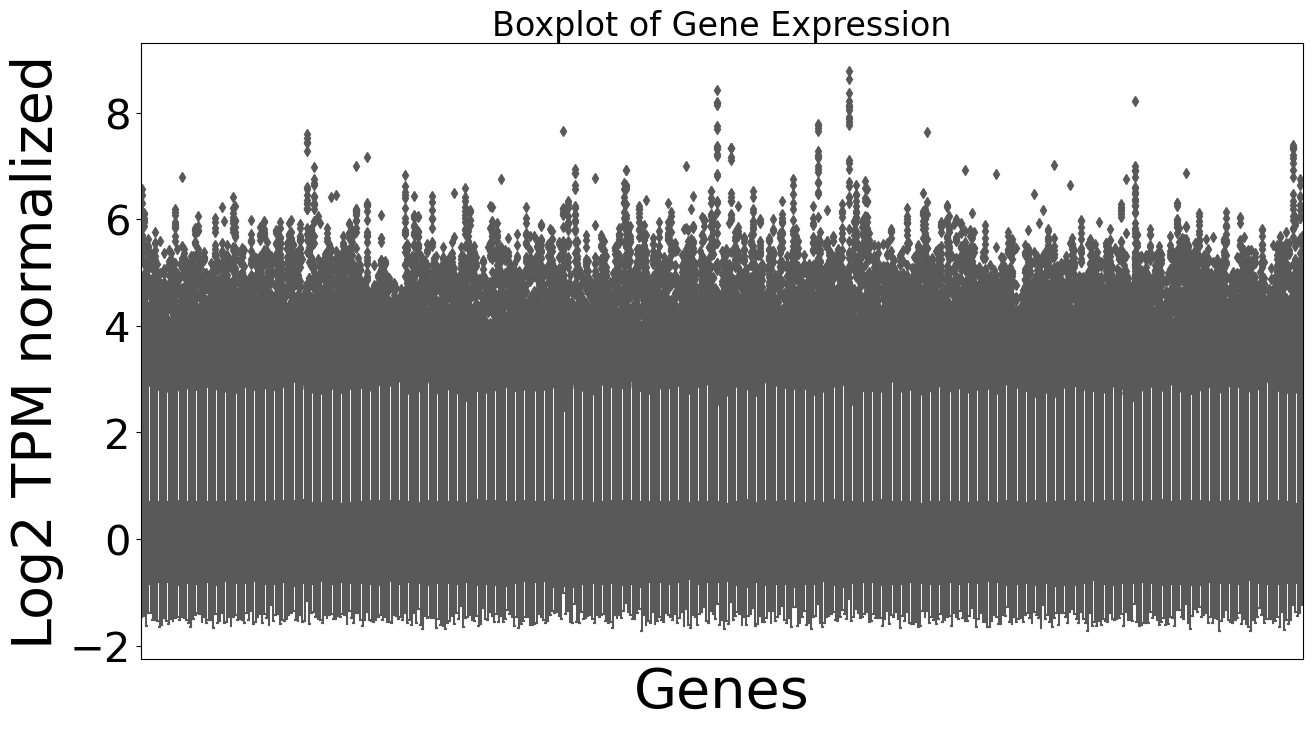

In [25]:
scaler = StandardScaler()
log2_tpm_normalized = pd.DataFrame(scaler.fit_transform(log2_tpm_PO), columns=log2_tpm_PO.columns)
# Create a boxplot for the gene expression data
plt.figure(figsize=(15, 8))
sns.boxplot(data=log2_tpm_normalized, orient="v", palette="Set2")
# Customize the plot
plt.ylabel('Log2 TPM normalized')
plt.xlabel('Genes')
plt.title('Boxplot of Gene Expression')
plt.xticks([])
plt.show()

In [ ]:
median = numpy.median(most_likely_expressions)
std = numpy.std(most_likely_expressions)
threshold = median - 1.96*std
print(median, std, threshold)
print()

new_threshold = 3.5
suspicious_samples = []
for i in range(len(most_likely_expressions)):
    if most_likely_expressions[i] <= new_threshold:
        print(working_samples[i], new_threshold, most_likely_expressions[i])
        suspicious_samples.append(working_samples[i])
print(suspicious_samples)

findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

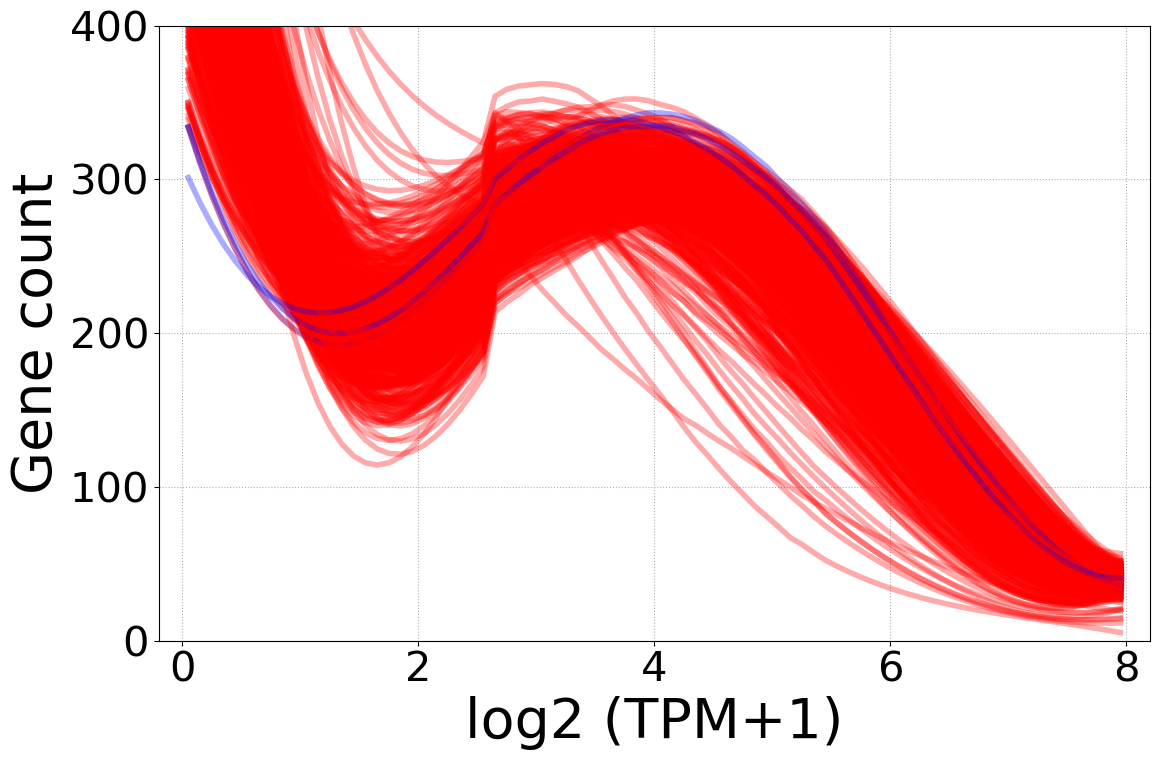

In [28]:
for i in range(len(working_samples)):
    if working_samples[i] in suspicious_samples:
        matplotlib.pyplot.plot(plotting_x, all_hats[i], '-', lw=4, alpha=1/3, color='red')
    else:
        matplotlib.pyplot.plot(plotting_x, all_hats[i], '-', lw=4, alpha=1/3, color='blue')
    
matplotlib.pyplot.xlim([numpy.min(plotting_x)-0.25, numpy.max(plotting_x)+0.25])
matplotlib.pyplot.ylim([0, 400])

matplotlib.pyplot.xlabel('log2 (TPM+1)')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')
#matplotlib.pyplot.legend(ncol=10, fontsize=12, bbox_to_anchor=(1.02, 1.25))

matplotlib.pyplot.tight_layout()

findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

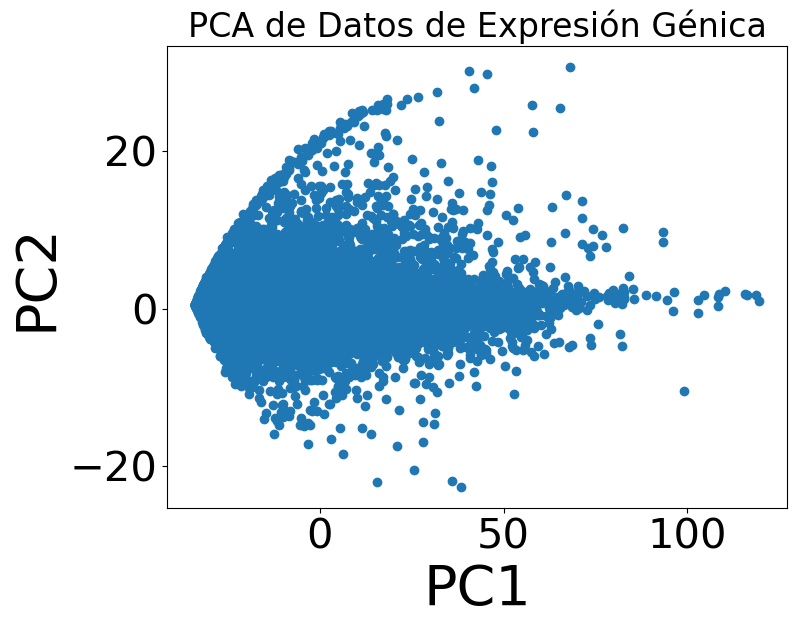

In [29]:
from sklearn.decomposition import PCA
n_componentes = 2  # Elige el número de componentes principales que deseas
pca = PCA(n_components=n_componentes)
componentes_principales = pca.fit_transform(log2_tpm_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1])
plt.xlabel('PC1')  
plt.ylabel('PC2')  
plt.title('PCA de Datos de Expresión Génica')
plt.show()
'''FALTA ARREGLAR EL GRAFIC'''

In [30]:
#We use '.transpose()' function to change df format so we obtain values that were in columns now in rows and viceversa
transpose = log2_tpm_PO.transpose()
print(transpose.shape)
transpose.head()

(521, 18986)


gene_id,ENSG00000000003.15,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,ENSG00000001461.17,...,ENSG00000288398.1,ENSG00000288543.1,ENSG00000288547.3,ENSG00000288558.2,ENSG00000288559.1,ENSG00000288573.1,ENSG00000288596.2,ENSG00000288612.1,ENSG00000288658.1,ENSG00000288670.1
00f54652-691e-4446-869a-4dd51c236f56,4.351367,5.374890,2.585011,2.610275,3.133695,5.695910,3.336098,4.101995,2.679424,5.199743,...,2.895574,0.000000,2.705779,1.971516,1.612069,2.541118,3.140697,2.267206,0.245009,2.961197
017f7806-7804-43b9-8123-e1b48d2d6496,5.036846,6.403392,2.647729,3.567631,7.188441,5.396410,3.753476,4.853177,2.432612,5.337971,...,2.273247,2.817623,0.640251,1.055196,1.395885,1.498149,2.158919,0.692070,0.210389,3.231171
02baceff-cbab-41cb-b801-be18ad6991b2,6.354911,6.936608,3.908717,3.186786,5.688273,5.910279,4.933129,5.779504,2.667438,5.551842,...,4.697963,0.000000,0.880019,3.231156,2.247988,3.072192,3.460860,1.013498,1.273456,4.651649
036f7712-a636-4198-b568-6c85d9db4a3b,5.400657,5.871459,2.423874,4.123310,6.598810,5.631902,3.638711,4.427928,2.903366,5.438586,...,3.041839,2.248049,0.882056,1.190488,1.209266,0.911193,1.627000,0.464877,0.092343,3.092241
0386037f-728c-47b0-93d0-6bb81b8b2a05,5.331845,6.195989,2.458723,2.984334,2.575216,6.038208,4.588091,4.207721,3.067725,5.763497,...,4.091810,0.000000,4.018892,2.295488,1.164915,1.917890,1.813771,0.606158,2.268794,4.301668


In [31]:
#remove low quality samples 
strict = transpose.drop(index=['0386037f-728c-47b0-93d0-6bb81b8b2a05', '144be06b-54da-4b42-a219-8bbe88cc7f78', '1e100c4d-13eb-4e5a-9117-ead385902710', '1e31f670-de56-4122-8966-42767135b420', '20c70125-f4ec-4d52-9efd-a207b559fedc', '2231c28a-bf18-4c0c-885c-42896df3b0e8', '284b2aab-f424-43d3-b160-78f2c28ecf94', '2b7a660d-f472-476a-9145-cae4f3ba5e4c', '2ea7afdd-f947-47e6-9516-b6f38e0a1967', '3682a3e2-17ed-4f6c-b4de-9057e6d7f4c6', '3762f95e-180b-43c2-967c-0e138fb23b63']) #canviar el nom de la mostra que cal eliminar 
print(strict.shape)
strict.head()

(510, 18986)


gene_id,ENSG00000000003.15,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,ENSG00000001461.17,...,ENSG00000288398.1,ENSG00000288543.1,ENSG00000288547.3,ENSG00000288558.2,ENSG00000288559.1,ENSG00000288573.1,ENSG00000288596.2,ENSG00000288612.1,ENSG00000288658.1,ENSG00000288670.1
00f54652-691e-4446-869a-4dd51c236f56,4.351367,5.374890,2.585011,2.610275,3.133695,5.695910,3.336098,4.101995,2.679424,5.199743,...,2.895574,0.000000,2.705779,1.971516,1.612069,2.541118,3.140697,2.267206,0.245009,2.961197
017f7806-7804-43b9-8123-e1b48d2d6496,5.036846,6.403392,2.647729,3.567631,7.188441,5.396410,3.753476,4.853177,2.432612,5.337971,...,2.273247,2.817623,0.640251,1.055196,1.395885,1.498149,2.158919,0.692070,0.210389,3.231171
02baceff-cbab-41cb-b801-be18ad6991b2,6.354911,6.936608,3.908717,3.186786,5.688273,5.910279,4.933129,5.779504,2.667438,5.551842,...,4.697963,0.000000,0.880019,3.231156,2.247988,3.072192,3.460860,1.013498,1.273456,4.651649
036f7712-a636-4198-b568-6c85d9db4a3b,5.400657,5.871459,2.423874,4.123310,6.598810,5.631902,3.638711,4.427928,2.903366,5.438586,...,3.041839,2.248049,0.882056,1.190488,1.209266,0.911193,1.627000,0.464877,0.092343,3.092241
04bbfd91-0b04-4659-a32b-ee3afbc1f30e,5.920281,6.750468,3.890077,2.235268,6.281372,5.441759,4.939523,5.888892,2.669888,5.569412,...,4.392826,0.000000,1.666211,2.777325,2.052625,1.788477,2.486328,1.377624,0.526870,4.178356


In [32]:
features = strict.columns
x = strict.loc[:, features].values

x = sklearn.preprocessing.StandardScaler().fit_transform(x)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pandas.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
x

array([[-1.94906544, -2.28228921, -0.74885602, ...,  2.61352227,
        -0.5019296 , -1.85288171],
       [-0.81303369,  0.02091209, -0.62583528, ..., -0.73505262,
        -0.54615875, -1.24314982],
       [ 1.37136912,  1.21498303,  1.84756591, ..., -0.05173039,
         0.81197676,  1.9649762 ],
       ...,
       [ 1.35644822,  0.17566488, -0.6147937 , ..., -0.82951294,
        -0.30448845, -1.34360843],
       [-1.25676437, -2.49349774, -1.11010577, ...,  0.53158976,
        -0.76422464, -1.52354741],
       [-0.99350756, -1.06400662, -2.22110781, ...,  0.30741854,
        -0.81494378, -2.16003986]])

In [33]:
pca.explained_variance_ratio_

array([0.29121331, 0.10263044])

findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans' not found.
findfont: Font family 'FreeSans'

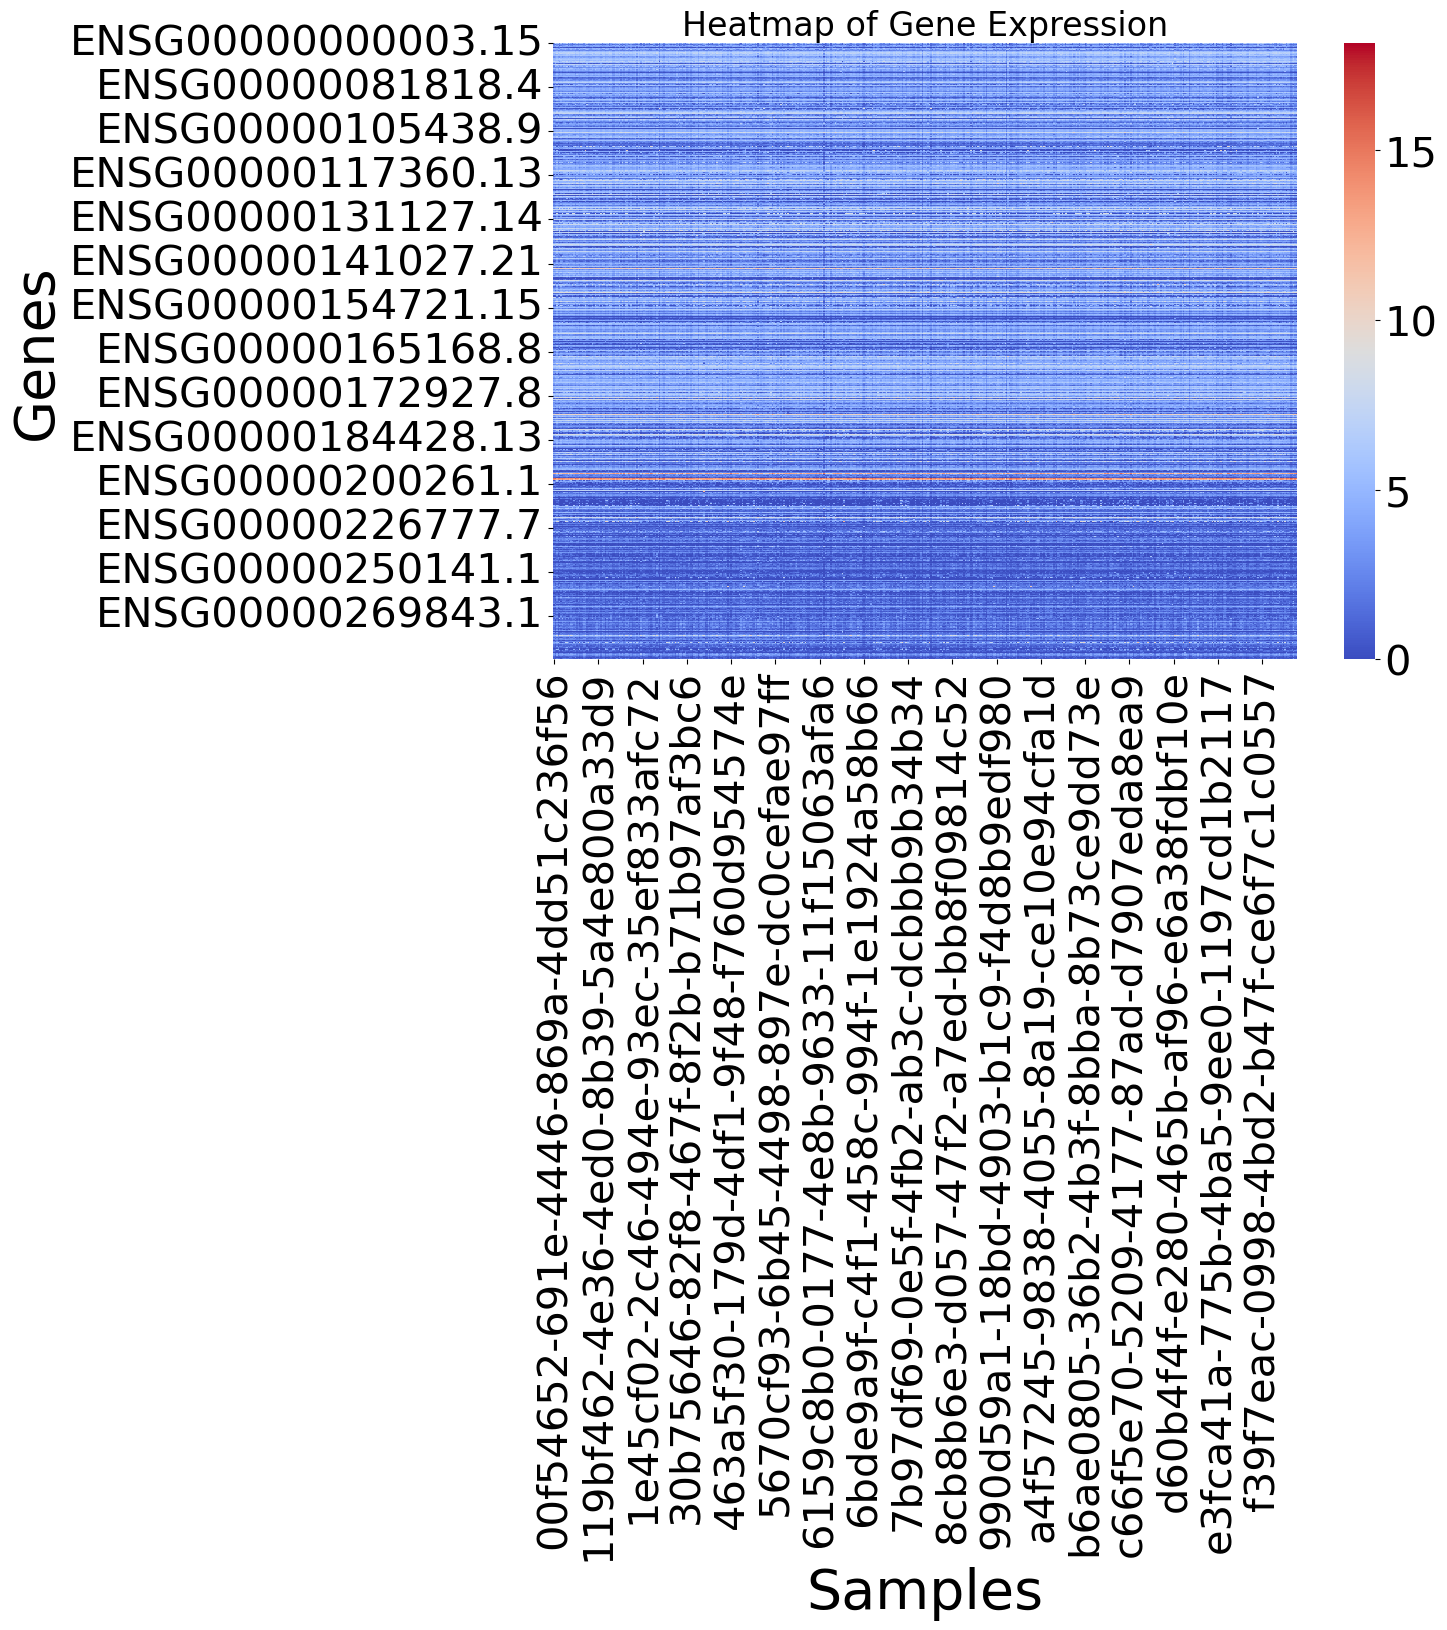

In [34]:
'''HEATMAP OF GENE EXPRESSION   ---> ARREGLAR'''
plt.figure(figsize=(12, 8))  # Set the figure size as needed
sns.heatmap(log2_tpm_PO, cmap='coolwarm', annot=False, cbar=True)
# Customize the plot
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.title('Heatmap of Gene Expression')
# Show the plot
plt.show()